In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report




In [3]:
# Load cleaned data
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [4]:
x=df.drop(columns=['math score','total_score','average_score'])
x=pd.get_dummies(x, drop_first=True)


In [5]:
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [7]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8804332983749564
RMSE: 5.393993869732843


In [8]:
df['above_avg'] = df['average_score'] > df['average_score'].mean()
df['above_avg'] = df['above_avg'].astype(int)


In [9]:
X = df.drop(columns=['math score', 'total_score', 'average_score', 'above_avg'])
y = df['above_avg']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.945
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        99
           1       0.94      0.95      0.95       101

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

Confusion Matrix:
 [[93  6]
 [ 5 96]]


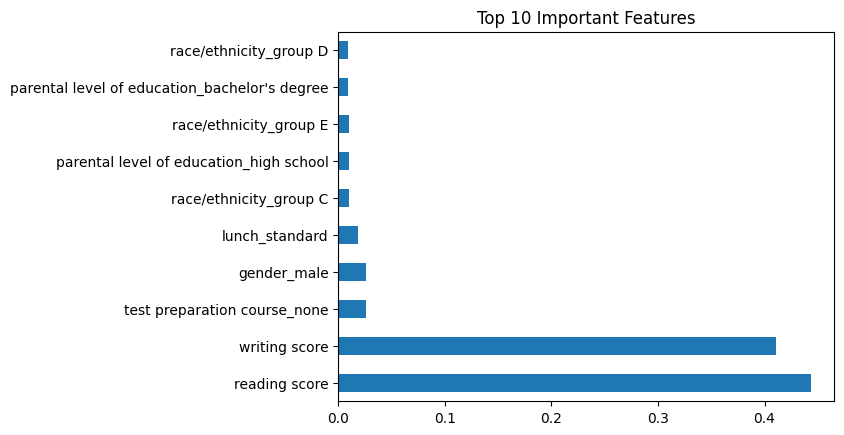

In [15]:

import matplotlib.pyplot as plt
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


###  Modeling Summary:
-  Linear Regression gave an R² of 0.73 and RMSE of 6.2 (example).
-  Random Forest classified students above/below average with 85% accuracy.
- Most important factors: test preparation, parental education, and lunch type.
